In [1]:
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt

In [2]:
отрезать сигма сечение сверху и снизу 
если есть экзопланета то снизу транзит
сигма сверху
это из-за шумов 
в ервом приближении норм 
попробоваать растянуть график

SyntaxError: invalid syntax (664361360.py, line 1)

In [3]:
search_result= lk.search_lightcurve ('HAT-P-24', mission='TESS', sector=33)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 33,2020,SPOC,20,440777904,0.0
1,TESS Sector 33,2020,SPOC,120,440777904,0.0
2,TESS Sector 33,2020,TESS-SPOC,600,440777904,0.0
3,TESS Sector 33,2020,QLP,600,440777904,0.0
4,TESS Sector 33,2020,CDIPS,1800,440777904,0.0


Text(0, 0.5, 'PDCSAP FLUX')

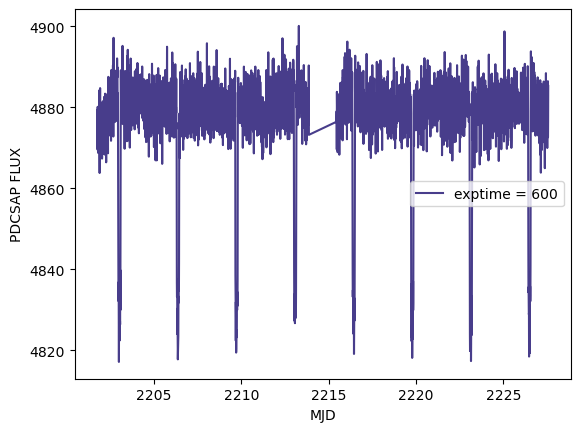

In [169]:
lc600 = search_result[2].download()
plt.subplot(1, 1, 1)
plt.plot(lc600.time.value, lc600.pdcsap_flux.value, color = 'darkslateblue', label = 'exptime = 600')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")


Text(0, 0.5, 'PDCSAP FLUX')

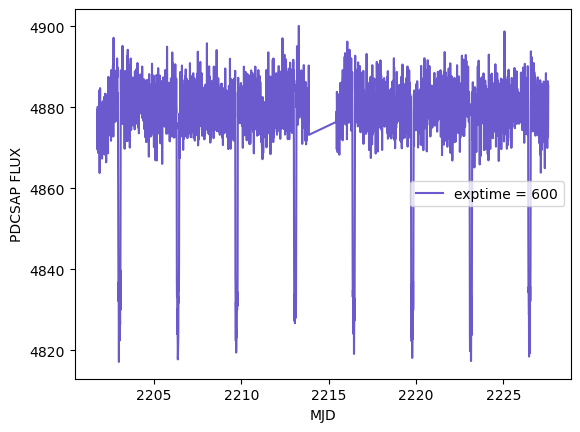

In [189]:
lc600_flatten=lc600.flatten(window_length=20, polyorder=2, niters=5, sigma=2)
plt.subplot(1, 1, 1)
plt.plot(lc600_flatten.time.value, lc600_flatten.pdcsap_flux.value, color = 'slateblue', label = 'exptime = 600')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")


Text(0, 0.5, 'PDCSAP FLUX')

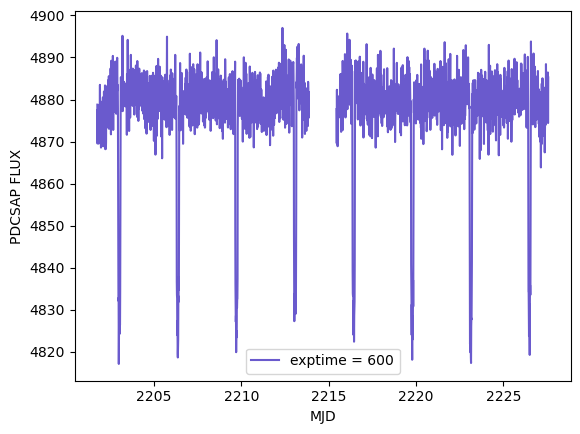

In [190]:
lc600_flatten=lc600.bin(time_bin_size=0.01).flatten(window_length=20, polyorder=2, niters=5, sigma=2)
plt.subplot(1, 1, 1)
plt.plot(lc600_flatten.time.value, lc600_flatten.pdcsap_flux.value, color = 'slateblue', label = 'exptime = 600')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")


<Quantity 3.35586171 d>

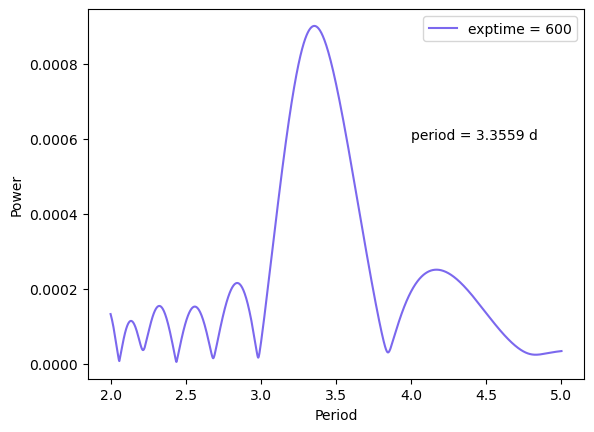

In [193]:
lc600_pg= lc600_flatten.to_periodogram(method='ls', minimum_period=2, maximum_period=5,oversample_factor=1000)
plt.subplot(1, 1, 1)
plt.plot(lc600_pg.period.value, lc600_pg.power.value, color = 'mediumslateblue', label = 'exptime = 600')
plt.legend()
plt.text(4, 0.0006, f"period = {round(lc600_pg.period_at_max_power, 4)}")
plt.xlabel("Period")
plt.ylabel("Power")
lc600_pg.period_at_max_power

Text(0, 0.5, 'PDCSAP FLUX')

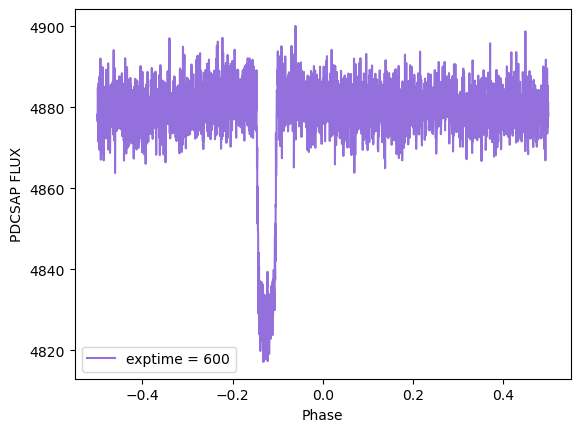

In [166]:
lc600_phase=lc600_flatten.fold(period=lc600_pg.period_at_max_power, epoch_phase=0.5, normalize_phase=True)
plt.plot(lc600_phase.phase.value, lc600_phase.pdcsap_flux.value, color = 'mediumpurple', label = 'exptime = 600')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("PDCSAP FLUX")

Text(0, 0.5, 'PDCSAP FLUX')

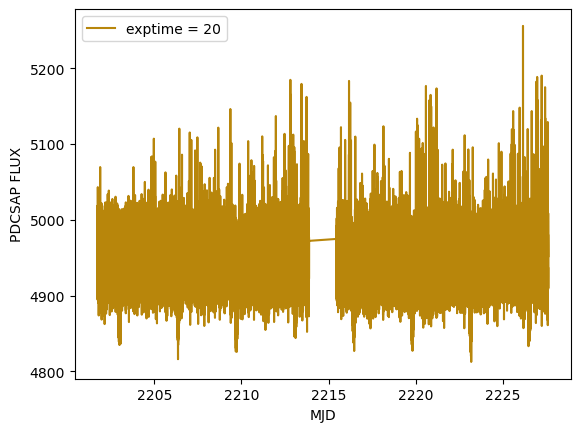

In [185]:
lc20 = search_result[0].download()
plt.subplot(1, 1, 1)
plt.plot(lc20.time.value, lc20.pdcsap_flux.value, color = 'darkgoldenrod', label = 'exptime = 20')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")

Text(0, 0.5, 'PDCSAP FLUX')

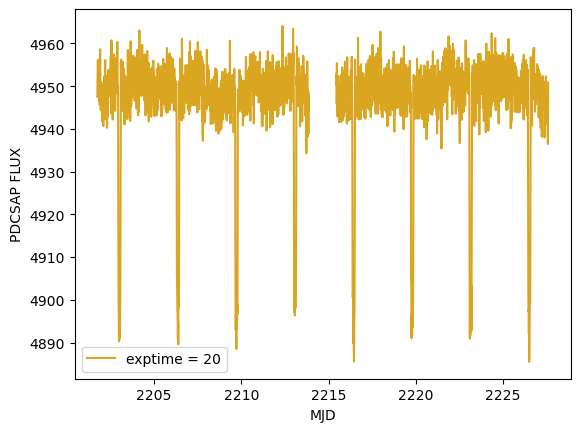

In [186]:
lc20_new, lc20_mask = lc20.remove_outliers(sigma=5, return_mask=True)
lc20_new = lc20_new.bin(time_bin_size=0.01).flatten(window_length=20, polyorder=2, niters=5, sigma=2)
plt.subplot(1, 1, 1)
plt.plot(lc20_new.time.value, lc20_new.pdcsap_flux.value, color = 'goldenrod', label = 'exptime = 20')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")

<Quantity 3.34845147 d>

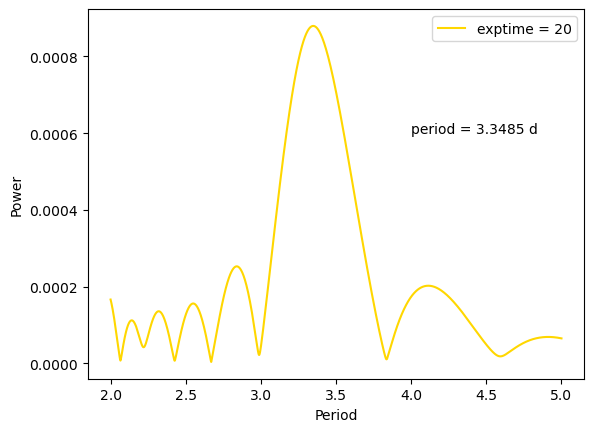

In [187]:
lc20_pg= lc20_new.to_periodogram(method='ls', minimum_period=2, maximum_period=5,oversample_factor=1000)
plt.subplot(1, 1, 1)
plt.plot(lc20_pg.period.value, lc20_pg.power.value, color = 'gold', label = 'exptime = 20')
plt.text(4, 0.0006, f"period = {round(lc20_pg.period_at_max_power, 4)}")
plt.legend()
plt.xlabel("Period")
plt.ylabel("Power")
lc20_pg.period_at_max_power

Text(0, 0.5, 'PDCSAP FLUX')

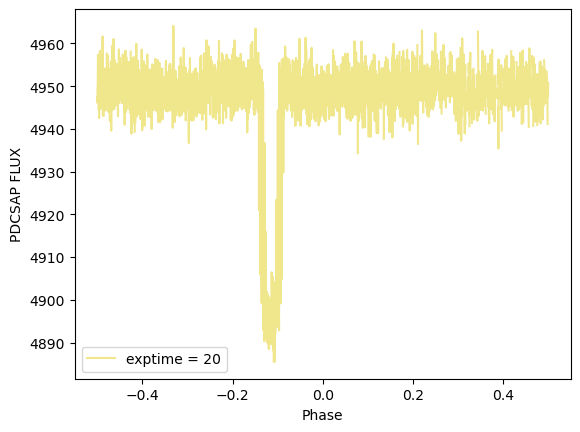

In [191]:
lc20_phase=lc20_new.fold(period=lc20_pg.period_at_max_power, epoch_phase=0.5, normalize_phase=True)
plt.plot(lc20_phase.phase.value, lc20_phase.pdcsap_flux.value, color = 'khaki', label = 'exptime = 20')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("PDCSAP FLUX")

Text(0, 0.5, 'PDCSAP FLUX')

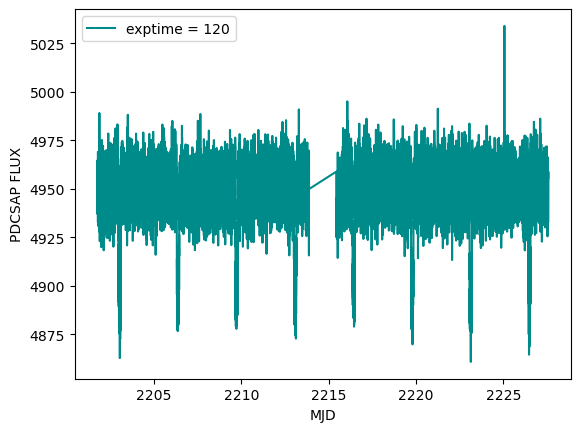

In [171]:
lc120 = search_result[1].download()
plt.subplot(1, 1, 1)
plt.plot(lc120.time.value, lc120.pdcsap_flux.value, color = 'darkcyan', label = 'exptime = 120')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")

Text(0, 0.5, 'PDCSAP FLUX')

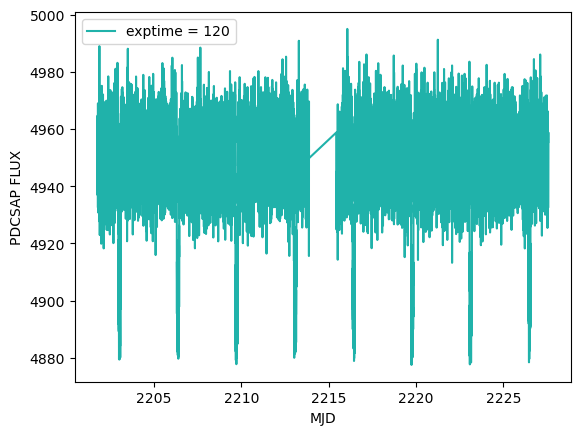

In [172]:
lc120_new, lc120_mask = lc120.remove_outliers(sigma=5, return_mask=True)
plt.subplot(1, 1, 1)
plt.plot(lc120_new.time.value, lc120_new.pdcsap_flux.value, color = 'lightseagreen', label = 'exptime = 120')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")

Text(0, 0.5, 'PDCSAP FLUX')

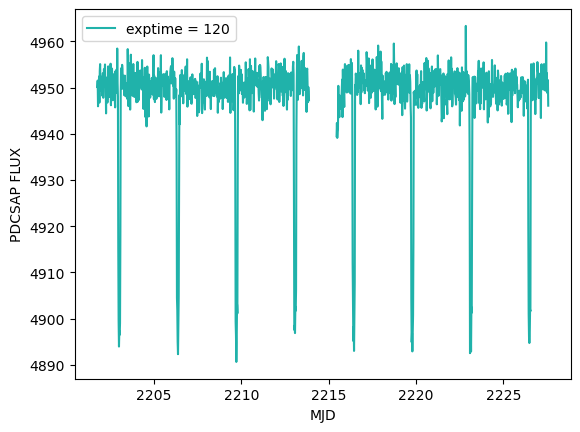

In [173]:
lc120_new, lc120_mask = lc120.remove_outliers(sigma=5, return_mask=True)
lc120_new = lc120_new.bin(time_bin_size=0.02).flatten(window_length=20, polyorder=2, niters=5, sigma=2)
plt.subplot(1, 1, 1)
plt.plot(lc120_new.time.value, lc120_new.pdcsap_flux.value, color = 'lightseagreen', label = 'exptime = 120')
plt.legend()
plt.xlabel("MJD")
plt.ylabel("PDCSAP FLUX")

<Quantity 3.34845147 d>

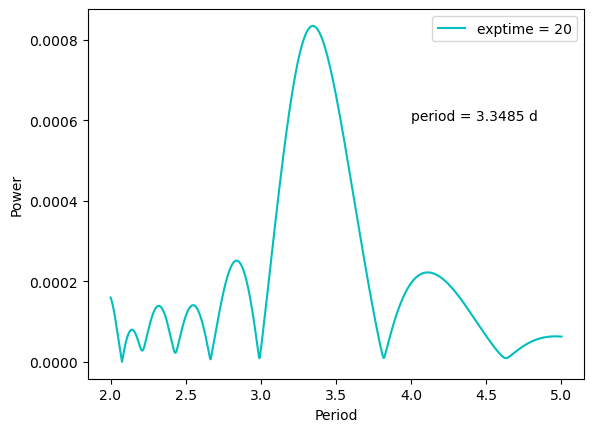

In [180]:
lc120_pg= lc120_new.to_periodogram(method='ls', minimum_period=2, maximum_period=5,oversample_factor=1000)
plt.subplot(1, 1, 1)
plt.plot(lc120_pg.period.value, lc120_pg.power.value, color = 'c', label = 'exptime = 20')
plt.text(4, 0.0006, f"period = {round(lc20_pg.period_at_max_power, 4)}")
plt.legend()
plt.xlabel("Period")
plt.ylabel("Power")
lc20_pg.period_at_max_power

Text(0, 0.5, 'PDCSAP FLUX')

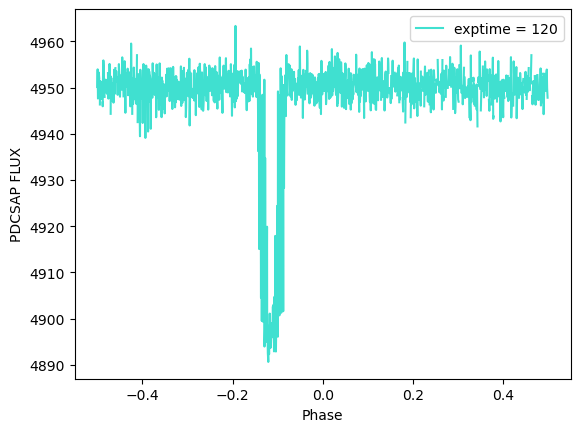

In [192]:
lc120_phase=lc120_new.fold(period=lc120_pg.period_at_max_power, epoch_phase=0.5, normalize_phase=True)
plt.plot(lc120_phase.phase.value, lc120_phase.pdcsap_flux.value, color = 'turquoise', label = 'exptime = 120')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("PDCSAP FLUX")